In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb

In [2]:
df = pd.read_csv('/home/smebellis/ece5831_final_project/processed_data/post_processing_clustered.csv') 
sampled_df = df.sample(n=1000, random_state=42)

In [46]:
sampled_df.to_csv("test.csv")

In [39]:
test_sample = df.sample(n=1000, random_state=23)
status_mapping = {'Light': 1, 'Medium': 2, 'Heavy': 3}
test_sample['Traffic_Status_Numeric'] = test_sample['TRAFFIC_STATUS'].map(status_mapping)
features = ['Lat', 'Long','END_LAT', 'END_LONG', 'TRAVEL_TIME']
target = 'Traffic_Status_Numeric'

x1 = test_sample[features]



In [21]:
status_mapping = {'Light': 1, 'Medium': 2, 'Heavy': 3}
sampled_df['Traffic_Status_Numeric'] = sampled_df['TRAFFIC_STATUS'].map(status_mapping)

In [23]:
features = ['Lat', 'Long','END_LAT', 'END_LONG', 'TRAVEL_TIME']
target = 'Traffic_Status_Numeric'

In [24]:
X = sampled_df[features]
y = sampled_df[target]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [44]:
params = {
    'objective': 'reg:logistic',
    'max_depth': 6,  # You can tune this hyperparameter
    'eta': 0.1,      # Learning rate, can be tuned
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'eval_metric': 'rmse'
}

In [45]:
evals = [(dtrain, 'train'), (dtest, 'eval')]
model = xgb.train(params, dtrain, num_boost_round=100, evals=evals, early_stopping_rounds=10)


XGBoostError: [16:47:03] /workspace/src/objective/regression_obj.cu:88: label must be in [0,1] for logistic regression
Stack trace:
  [bt] (0) /home/smebellis/miniconda3/envs/predict_pro/lib/python3.11/site-packages/xgboost/lib/libxgboost.so(+0x22dcbc) [0x7fa9c18b3cbc]
  [bt] (1) /home/smebellis/miniconda3/envs/predict_pro/lib/python3.11/site-packages/xgboost/lib/libxgboost.so(+0xc72227) [0x7fa9c22f8227]
  [bt] (2) /home/smebellis/miniconda3/envs/predict_pro/lib/python3.11/site-packages/xgboost/lib/libxgboost.so(+0x665a62) [0x7fa9c1ceba62]
  [bt] (3) /home/smebellis/miniconda3/envs/predict_pro/lib/python3.11/site-packages/xgboost/lib/libxgboost.so(+0x5c34d2) [0x7fa9c1c494d2]
  [bt] (4) /home/smebellis/miniconda3/envs/predict_pro/lib/python3.11/site-packages/xgboost/lib/libxgboost.so(+0x5caf59) [0x7fa9c1c50f59]
  [bt] (5) /home/smebellis/miniconda3/envs/predict_pro/lib/python3.11/site-packages/xgboost/lib/libxgboost.so(XGBoosterUpdateOneIter+0x6f) [0x7fa9c17bd52f]
  [bt] (6) /home/smebellis/miniconda3/envs/predict_pro/lib/python3.11/lib-dynload/../../libffi.so.8(+0xa052) [0x7faa84658052]
  [bt] (7) /home/smebellis/miniconda3/envs/predict_pro/lib/python3.11/lib-dynload/../../libffi.so.8(+0x8925) [0x7faa84656925]
  [bt] (8) /home/smebellis/miniconda3/envs/predict_pro/lib/python3.11/lib-dynload/../../libffi.so.8(ffi_call+0xde) [0x7faa8465706e]



In [29]:
y_pred = model.predict(dtest)

In [30]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

RMSE: 0.6922935913224978


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

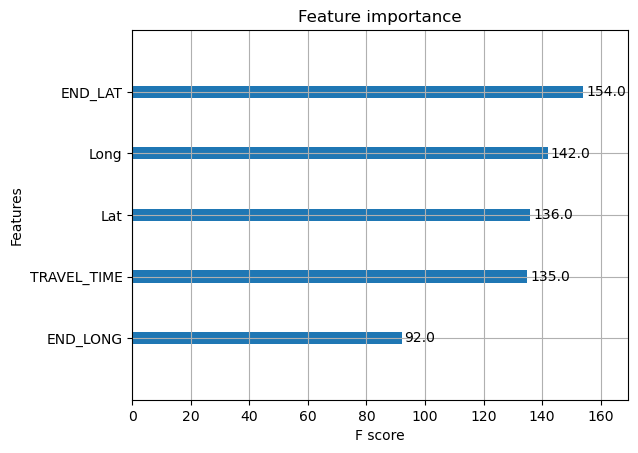

In [31]:
xgb.plot_importance(model)


In [40]:
dnew = xgb.DMatrix(x1)

In [43]:
predictions = model.predict(dnew)
predictions = np.clip(predictions, 0, 1)
print("Predicted Traffic Status:", predictions)

Predicted Traffic Status: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 

In [42]:
thresholds = {
    'High Traffic': 0.75,
    'Moderate Traffic': 0.25
}

for i, pred in enumerate(predictions):
    if pred > thresholds['High Traffic']:
        traffic_category = 'High Traffic'
    elif pred < thresholds['Moderate Traffic']:
        traffic_category = 'Low Traffic'
    else:
        traffic_category = 'Moderate Traffic'
    
    print(f"Prediction for Trip {i + 1}: {traffic_category}")

Prediction for Trip 1: High Traffic
Prediction for Trip 2: High Traffic
Prediction for Trip 3: High Traffic
Prediction for Trip 4: High Traffic
Prediction for Trip 5: High Traffic
Prediction for Trip 6: High Traffic
Prediction for Trip 7: High Traffic
Prediction for Trip 8: High Traffic
Prediction for Trip 9: High Traffic
Prediction for Trip 10: High Traffic
Prediction for Trip 11: High Traffic
Prediction for Trip 12: High Traffic
Prediction for Trip 13: High Traffic
Prediction for Trip 14: High Traffic
Prediction for Trip 15: High Traffic
Prediction for Trip 16: High Traffic
Prediction for Trip 17: High Traffic
Prediction for Trip 18: High Traffic
Prediction for Trip 19: High Traffic
Prediction for Trip 20: High Traffic
Prediction for Trip 21: High Traffic
Prediction for Trip 22: High Traffic
Prediction for Trip 23: High Traffic
Prediction for Trip 24: High Traffic
Prediction for Trip 25: High Traffic
Prediction for Trip 26: High Traffic
Prediction for Trip 27: High Traffic
Prediction